# Task6: Iris Dataset Classification with KNeighborsClassifier

## Importing Dataset

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 14.4MB/s]


In [5]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


## Loading the dataset



In [6]:
import pandas as pd

df = pd.read_csv('Iris.csv')
display(df.head())
display(df.info())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

## Preparing the data




In [7]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Normalizing features




In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaled X_train (first 5 rows):")
display(pd.DataFrame(X_train).head())
print("\nScaled X_test (first 5 rows):")
display(pd.DataFrame(X_test).head())

Scaled X_train (first 5 rows):


,0,1,2,3
0,-1.473937,1.220379,-1.563987,-1.309484
1,-0.133071,3.020017,-1.277280,-1.042922
2,1.085898,0.095606,0.385621,0.289886
3,-1.230143,0.770470,-1.219939,-1.309484
4,-1.717731,0.320560,-1.391963,-1.309484



Scaled X_test (first 5 rows):


,0,1,2,3
0,0.354517,-0.579258,0.557645,0.023324
1,-0.133071,1.670289,-1.162597,-1.176203
2,2.304867,-1.029168,1.819157,1.489413
3,0.232620,-0.354304,0.442962,0.423166
4,1.207795,-0.579258,0.614987,0.289886


## Training and evaluating the model



In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a list of different values for K
k_values = [1, 3, 5, 7, 9]

# Iterate through the list of K values
for k in k_values:
    print(f"\nTraining KNeighborsClassifier with K = {k}")

    # Instantiate KNeighborsClassifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the scaled training data
    knn.fit(X_train, y_train)

    # Make predictions on the scaled testing data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for K = {k}: {accuracy:.4f}")

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for K = {k}:\n{conf_matrix}")


Training KNeighborsClassifier with K = 1
Accuracy for K = 1: 1.0000
Confusion Matrix for K = 1:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Training KNeighborsClassifier with K = 3
Accuracy for K = 3: 1.0000
Confusion Matrix for K = 3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Training KNeighborsClassifier with K = 5
Accuracy for K = 5: 1.0000
Confusion Matrix for K = 5:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Training KNeighborsClassifier with K = 7
Accuracy for K = 7: 1.0000
Confusion Matrix for K = 7:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Training KNeighborsClassifier with K = 9
Accuracy for K = 9: 1.0000
Confusion Matrix for K = 9:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Visualizing decision boundaries


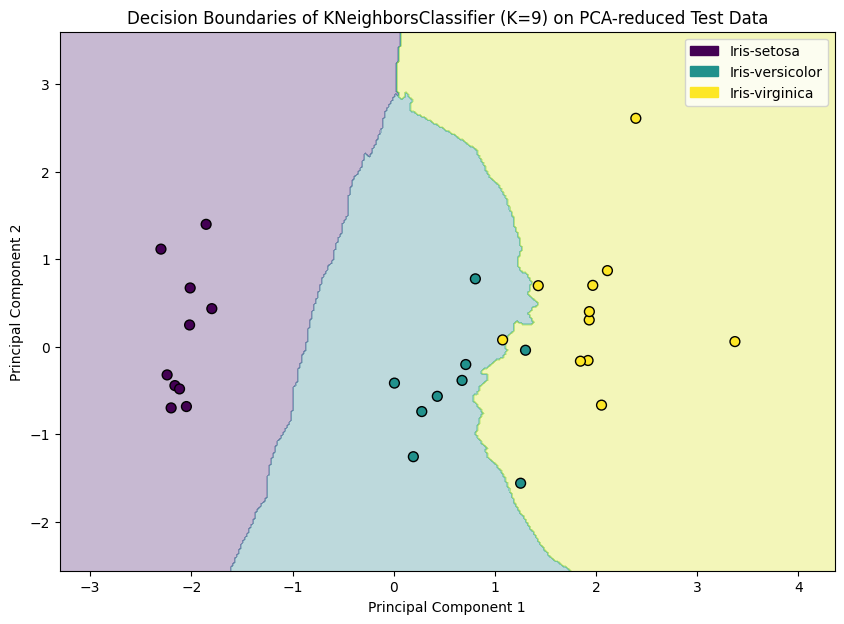

In [13]:
import matplotlib.patches as mpatches

# Plot the decision boundaries
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)

# Overlay the actual test data points
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_encoded, edgecolors='k', s=50)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Decision Boundaries of KNeighborsClassifier (K={k_viz}) on PCA-reduced Test Data')

# Add a legend - Create custom legend handles
colors = scatter.to_rgba(y_test_encoded) # Get the colors used in the scatter plot
legend_handles = []
for i, class_name in enumerate(classes):
    # Create a patch for each class color
    patch = mpatches.Patch(color=scatter.to_rgba([i])[0], label=class_name)
    legend_handles.append(patch)

plt.legend(handles=legend_handles)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 150 entries with features including 'SepalLengthCm', 'SepalWidthCm', ' 'PetalLengthCm', and 'PetalWidthCm', and the target variable 'Species'.
*   The data was successfully split into training (120 samples) and testing (30 samples) sets.
*   Feature scaling was applied using `StandardScaler`, transforming the features to have a mean of approximately 0 and a standard deviation of 1.
*   The KNeighborsClassifier model achieved a perfect accuracy score of 1.0000 on the test set for all tested K values (1, 3, 5, 7, and 9).
*   The confusion matrices for all tested K values showed zero misclassifications on the test set.
*   Decision boundaries were successfully visualized in 2D after reducing the dimensionality of the test data using PCA.

### Insights or Next Steps

*   Given the perfect accuracy on the test set, the model generalizes well to unseen data within this dataset. Further testing on more diverse datasets could provide a more robust evaluation.
*   Experimenting with a wider range of K values and using cross-validation on the training set could help confirm the optimal K value and provide a more reliable performance estimate.
